In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

df=pd.read_csv('diabetic_data.csv')
dF=df
df


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


## 1ère approche de la dataset:

In [ ]:
df.info()

In [ ]:
df.shape


In [ ]:
df.describe().T #.T = transposer le tableau

In [5]:
numerical_columns = ['num_medications',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses']


categorical_columns =  ['race',
  'diag_3',
  'diag_2',
  'diag_1',
  'tolazamide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'acetohexamide',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'glipizide',
  'repaglinide',
  'glimepiride',
  'gender',
  'age',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'chlorpropamide',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'nateglinide',
  'readmitted']

# Nettoyage de la dataset : 

### Colonnes majoritairement nulles : (49->46 colonnes)


In [ ]:
df.isna().sum()

In [3]:
df.replace('?',np.nan, inplace=True)
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

#### Suggestions écrasement de colonnes (nullité/pauvreté information)

In [13]:
columns_diabectic = df.columns
Field = [col for col in columns_diabectic]
Missing = [round(df[col].isnull().sum()/df[col].shape[0],4) for col in columns_diabectic]
Constant = [len(df[col].unique()) for col in columns_diabectic]
df_description = pd.DataFrame({
    "Colonne":Field,
    "% Missing":Missing,
    "Valeurs unique":Constant
})

df_description["Suggestion"] = df_description.apply(lambda x: "Remove_columns" if x["% Missing"] > 0.3 or x["Valeurs unique"] == 1 else "Not Remove", axis=1)

In [14]:
df_description[df_description["Suggestion"] == "Remove_columns"]

,Colonne,% Missing,Valeurs unique,Suggestion
5,weight,0.9686,10,Remove_columns
10,payer_code,0.3956,18,Remove_columns
11,medical_specialty,0.4908,73,Remove_columns
39,examide,0.0000,1,Remove_columns
40,citoglipton,0.0000,1,Remove_columns


In [15]:
# Colonne weight : nulle à 97%, donc inexploitable on l'écrase.

df=df.drop(['weight'], axis=1)


In [16]:
#Colonne payer_code :Integer identifier corresponding to 23 distinct values, for example, Blue Cross\BlueShield, Medicare, and self-pay. 

df.payer_code.unique()

array([nan, 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

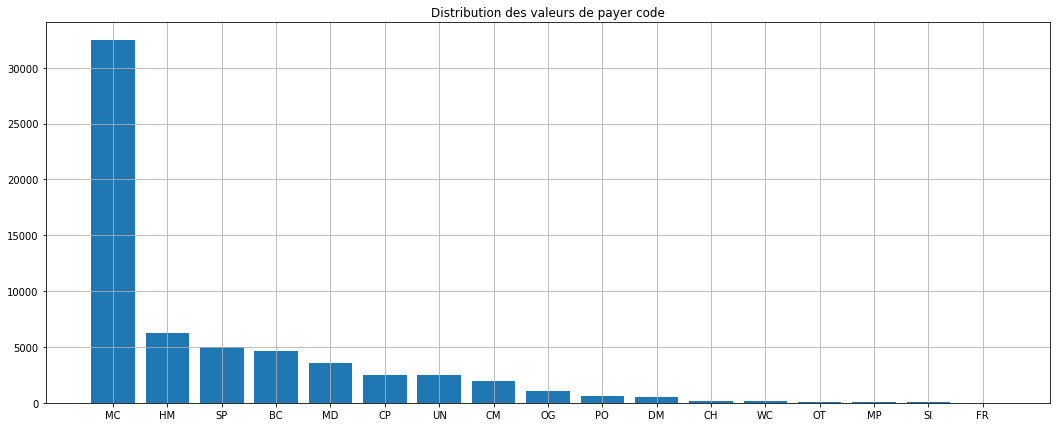

In [17]:
A= df.payer_code.value_counts()
plt.subplots(figsize=(18,7))

plt.bar(x=A.index,height=A.values)
plt.grid()
plt.title('Distribution des valeurs de payer code')
plt.show()

In [18]:

#  ->  pas plus d'information sur les abréviations de code
#  ->  colonne nulle à 40% 
#  -> Il n'y a qu'un code 'MC' qui est prépondérant devant les autres : pauvreté information

###CONCLUSION : on supprime payer_code.

df=df.drop(['payer_code'], axis=1)


In [19]:
# Colonne medical speciality : pas de réelle interet d'analyse avec notre problématique + colonne nulle à 50% : on la supprime

df.medical_specialty.unique()

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

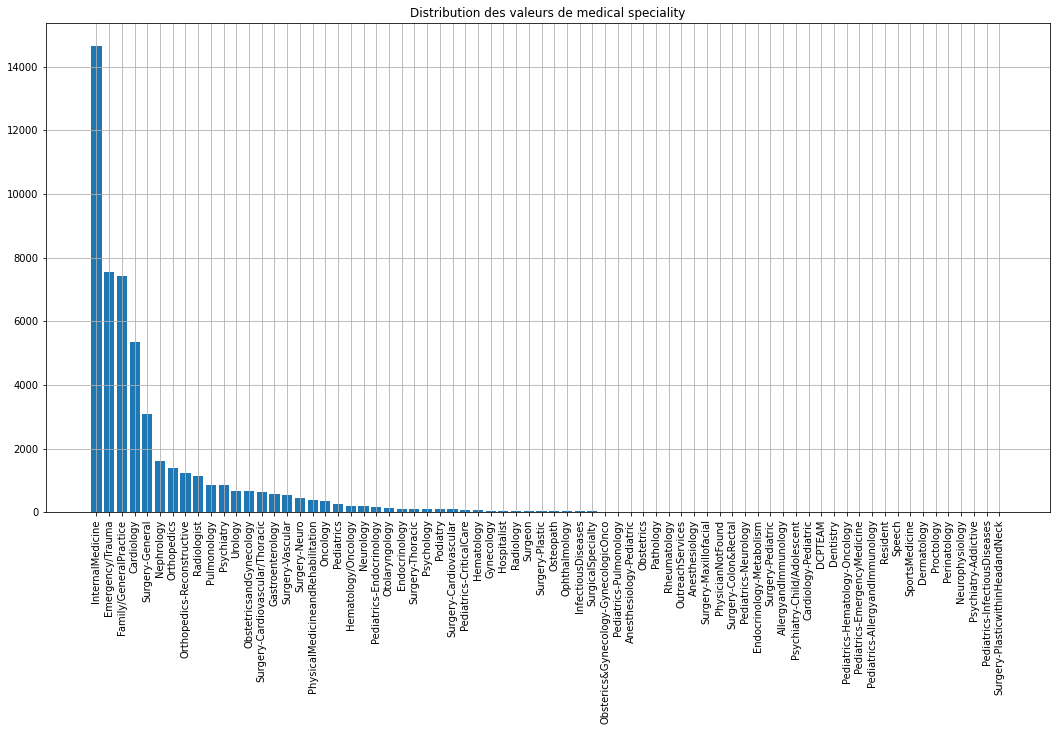

In [20]:
B= df.medical_specialty.value_counts()
plt.subplots(figsize=(18,9))
plt.bar(x=B.index,height=B.values)
plt.xticks( B.index, rotation=90)
plt.grid()
plt.title('Distribution des valeurs de medical speciality')
plt.show()

In [21]:
#  ->  colonne nulle à 50% 
#  -> Il n'y a qu'une spécialité 'Internal/Médecine' qui est prépondérante devant les autres, médecine gémérale, pas de réelle valeur ajoutée sur les caractéristique du patient : pauvreté information

###CONCLUSION : on supprime medical_speciality.
df=df.drop(['medical_specialty'], axis=1)


In [22]:
# Colonne de médicaments :
df['examide'].value_counts()

No    101766
Name: examide, dtype: int64

In [23]:
df['citoglipton'].value_counts()

No    101766
Name: citoglipton, dtype: int64

In [24]:
#  -> Il n'y a qu'une valeur 'No' : pauvreté information
#  -> On garde en remarque l'information de ces colonnes au cas où.

###CONCLUSION : on supprime ces colonnes de médicaments.

df=df.drop(['examide'], axis=1)
df=df.drop(['citoglipton'], axis=1)

 Remarque : aucun patient ne s'est vu prescrire de l'examide ou du citoglipton.

### Les colonnes nulles à moins de 2% sont nettoyées par lignes (101766 -> 98053 lignes)

In [25]:
df_description["Suggestion2"] = df_description.apply(lambda x: "Remove lines" if 0<x["% Missing"] < 0.4 else "Not Remove", axis=1)

df_drop_lines=df_description[df_description["Suggestion2"] == "Remove lines"]
df_drop_lines=df_drop_lines.drop(columns=['Suggestion'])
df_drop_lines

,Colonne,% Missing,Valeurs unique,Suggestion2
2,race,0.0223,6,Remove lines
10,payer_code,0.3956,18,Remove lines
18,diag_1,0.0002,717,Remove lines
19,diag_2,0.0035,749,Remove lines
20,diag_3,0.0140,790,Remove lines


In [26]:
## Les colonnes diag_1 2 3:

#  -> Richesse information des colonnes diag_1 2 3
#  -> Colonnes nulles à moins de 0.2%

#### CONCLUSION : Les colonnes diag sont nettoyées par lignes

df=df.dropna(subset=['diag_1','diag_2','diag_3'])



In [27]:
#La colonne race :
# -> les ethnies non rensignés sont synonyme de l'ethnie Other, s'ils font parties des ethnie prépondérantes (Caucasian AfricanAmerican), ils restent minimes en nombre.

### CONCLUSION :  les valeurs nulles sont regroupées avec la valeur Other
df.race.unique()
df.race=df.race.fillna('Other')
df.race.unique()


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [28]:
#Vérification de colonnes sans NaN:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

## Repérer les colonnes moins pertinentes (45 -> ? col)

- Discharge disposition Nominal Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
- Admission source Nominal Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
- Number of lab procedures Numeric Number of lab tests performed during the encounter
- Number of procedures Numeric Number of procedures (other than lab tests) performed during the encounter

    -Type 1 diabetes has only one treatment: insulin replacement. There is no other treatment for Type 1 diabetes and without    insulin, death is very likely. Whereas Type 2 diabetes can be managed with diet, weight loss, medications, and/or insulin.
(source :https://canohealth.com/news/blog/the-difference-between-type-1-and-type-2-diabetes/#:~:text=Type%201%20diabetes%20has%20only,medications%2C%20and%2For%20insulin.)


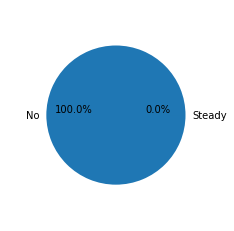

No        100243
Steady         1
Name: metformin-pioglitazone, dtype: int64


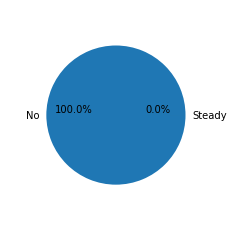

No        100242
Steady         2
Name: metformin-rosiglitazone, dtype: int64


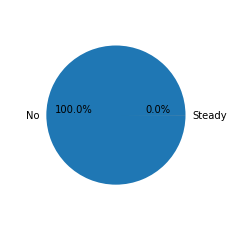

No        100231
Steady        13
Name: glipizide-metformin, dtype: int64


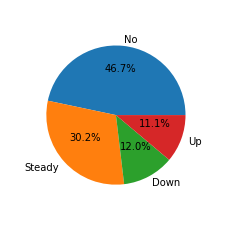

No        46802
Steady    30270
Down      12020
Up        11152
Name: insulin, dtype: int64


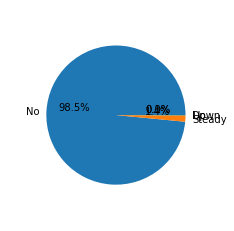

No        98711
Steady     1380
Up          108
Down         45
Name: repaglinide, dtype: int64


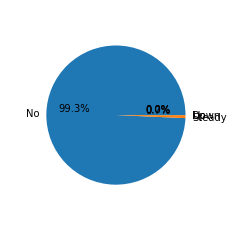

No        99546
Steady      663
Up           24
Down         11
Name: nateglinide, dtype: int64


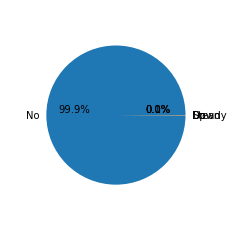

No        100160
Steady        77
Up             6
Down           1
Name: chlorpropamide, dtype: int64


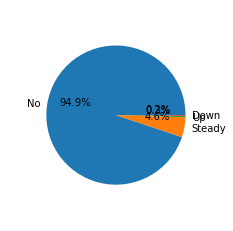

No        95104
Steady     4627
Up          321
Down        192
Name: glimepiride, dtype: int64


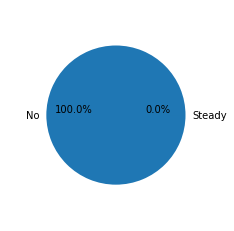

No        100243
Steady         1
Name: acetohexamide, dtype: int64


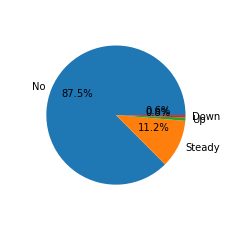

No        87682
Steady    11238
Up          767
Down        557
Name: glipizide, dtype: int64


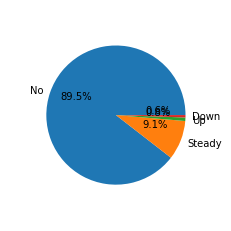

No        89719
Steady     9160
Up          809
Down        556
Name: glyburide, dtype: int64


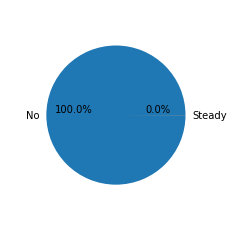

No        100221
Steady        23
Name: tolbutamide, dtype: int64


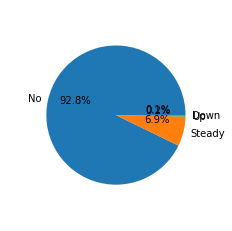

No        92999
Steady     6898
Up          231
Down        116
Name: pioglitazone, dtype: int64


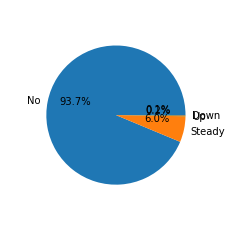

No        93941
Steady     6039
Up          177
Down         87
Name: rosiglitazone, dtype: int64


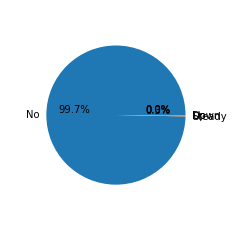

No        99939
Steady      292
Up           10
Down          3
Name: acarbose, dtype: int64


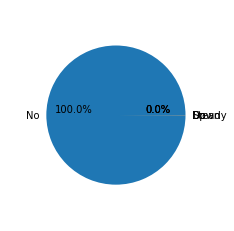

No        100207
Steady        31
Down           4
Up             2
Name: miglitol, dtype: int64


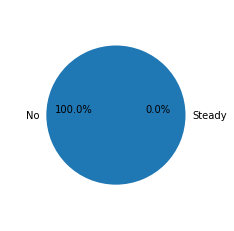

No        100241
Steady         3
Name: troglitazone, dtype: int64


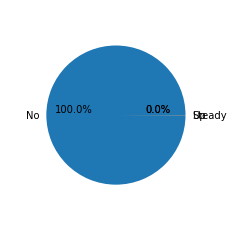

No        100207
Steady        36
Up             1
Name: tolazamide, dtype: int64


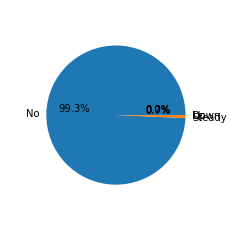

No        99549
Steady      681
Up            8
Down          6
Name: glyburide-metformin, dtype: int64


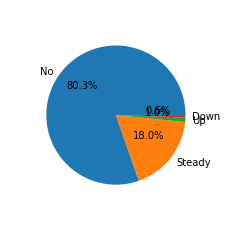

No        80543
Steady    18092
Up         1045
Down        564
Name: metformin, dtype: int64


In [29]:
# Nettoyage colonnes médicaments : 

medicament = ['metformin-pioglitazone','metformin-rosiglitazone', 'glipizide-metformin','insulin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide','glyburide-metformin',  'metformin']

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n'.format(pct, v=val)
        return my_format



def prop_med(L):

  for med in L:
    #sns.countplot(x = med, 
                 #data = df)
    
    s = df[med].value_counts()
    plt.pie(s,labels = s.index, autopct=autopct_format(s), radius = 0.8,labeldistance = 1.1)

    

    plt.show()
    print(df[f"{med}"].value_counts())
    

prop_med(medicament)

In [30]:
df=df.drop(columns=['metformin-pioglitazone','metformin-rosiglitazone','glipizide-metformin','tolazamide','troglitazone','miglitol','acarbose','tolbutamide','acetohexamide','chlorpropamide','nateglinide','repaglinide','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','glyburide-metformin','glimepiride-pioglitazone','rosiglitazone','pioglitazone','glyburide','glipizide','glimepiride','metformin'])

In [31]:

df=df.drop(columns=['discharge_disposition_id','admission_source_id'])

df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,3,59,0,18,0,0,0,276,250.01,255,9,None,None,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,2,44,1,16,0,0,0,8,250.43,403,7,None,None,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,51,0,8,0,0,0,197,157,250,5,None,None,Steady,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,3,31,6,16,0,0,0,414,411,250,9,None,None,Steady,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,51,0,16,0,0,0,250.13,291,458,9,None,>8,Down,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,5,33,3,18,0,0,1,560,276,787,9,None,None,Steady,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,53,0,9,1,0,0,38,590,296,13,None,None,Down,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,10,45,2,21,0,0,1,996,285,998,9,None,None,Up,Ch,Yes,NO


In [32]:
## Fusion des colonnes procedures : 

df['nb_procedures'] = df.loc[: , ['num_procedures', 'num_lab_procedures']].sum(axis=1)
df=df.drop(columns=['num_procedures', 'num_lab_procedures'], axis=1)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,nb_procedures
1,149190,55629189,Caucasian,Female,[10-20),1,3,18,0,0,0,276,250.01,255,9,None,None,Up,Ch,Yes,>30,59
2,64410,86047875,AfricanAmerican,Female,[20-30),1,2,13,2,0,1,648,250,V27,6,None,None,No,No,Yes,NO,16
3,500364,82442376,Caucasian,Male,[30-40),1,2,16,0,0,0,8,250.43,403,7,None,None,Up,Ch,Yes,NO,45
4,16680,42519267,Caucasian,Male,[40-50),1,1,8,0,0,0,197,157,250,5,None,None,Steady,Ch,Yes,NO,51
5,35754,82637451,Caucasian,Male,[50-60),2,3,16,0,0,0,414,411,250,9,None,None,Steady,No,Yes,>30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,16,0,0,0,250.13,291,458,9,None,>8,Down,Ch,Yes,>30,51
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,5,18,0,0,1,560,276,787,9,None,None,Steady,No,Yes,NO,36
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,9,1,0,0,38,590,296,13,None,None,Down,Ch,Yes,NO,53
101764,443857166,31693671,Caucasian,Female,[80-90),2,10,21,0,0,1,996,285,998,9,None,None,Up,Ch,Yes,NO,47


In [33]:
(df['gender']=='Unknown/Invalid').sum()
#on supprime le genre unkown
df = df[df.gender != 'Unknown/Invalid']
# on définit valeurs oui non readmission: 
df['readmitted'] = df['readmitted'].replace({"<30":'YES',
                         ">30":'YES'})

<ipython-input-33-1fced4defba6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmitted'] = df['readmitted'].replace({"<30":'YES',


### Data Visualisation

Corrélation des variables numériques

KeyError: ignored

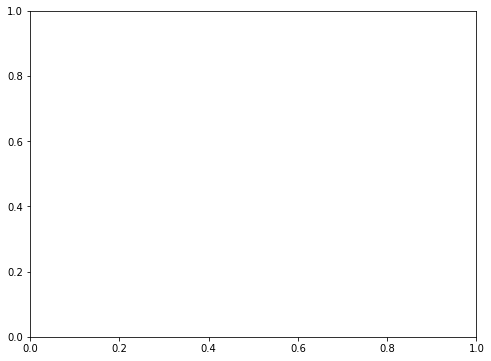

In [34]:
#heatmap colonnes numériques
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

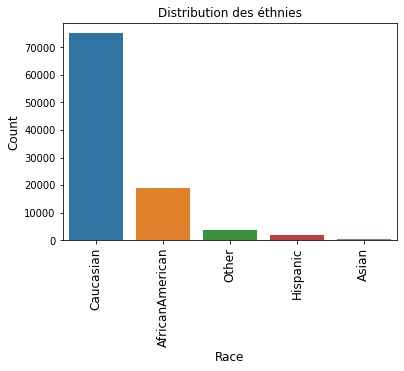

In [35]:
# distribution des différentes origines 
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution des éthnies', size = 12)
plt.show()

Text(0.5, 1.0, "Distribution d'insuline en fonction de l'âge ")

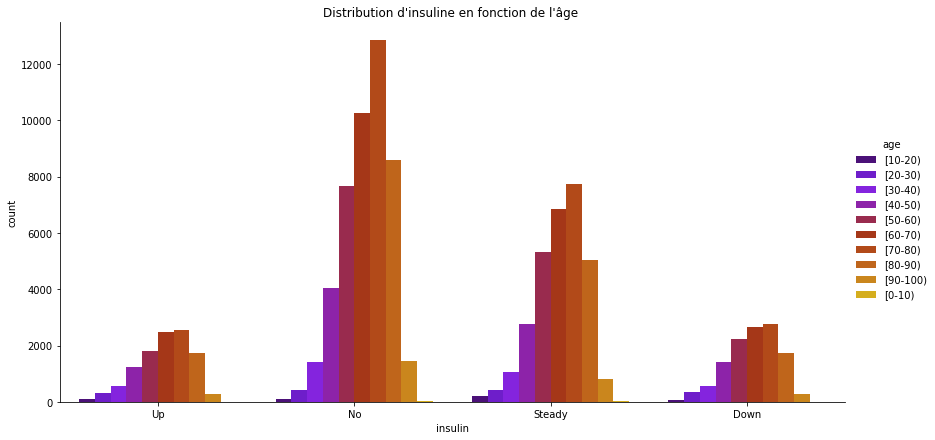

In [36]:
#prise d'insuline selon age

sns.catplot(x="insulin", hue="age", data=df, kind="count", height=6, aspect=2, palette="gnuplot");
plt.title("Distribution d'insuline en fonction de l'âge ")

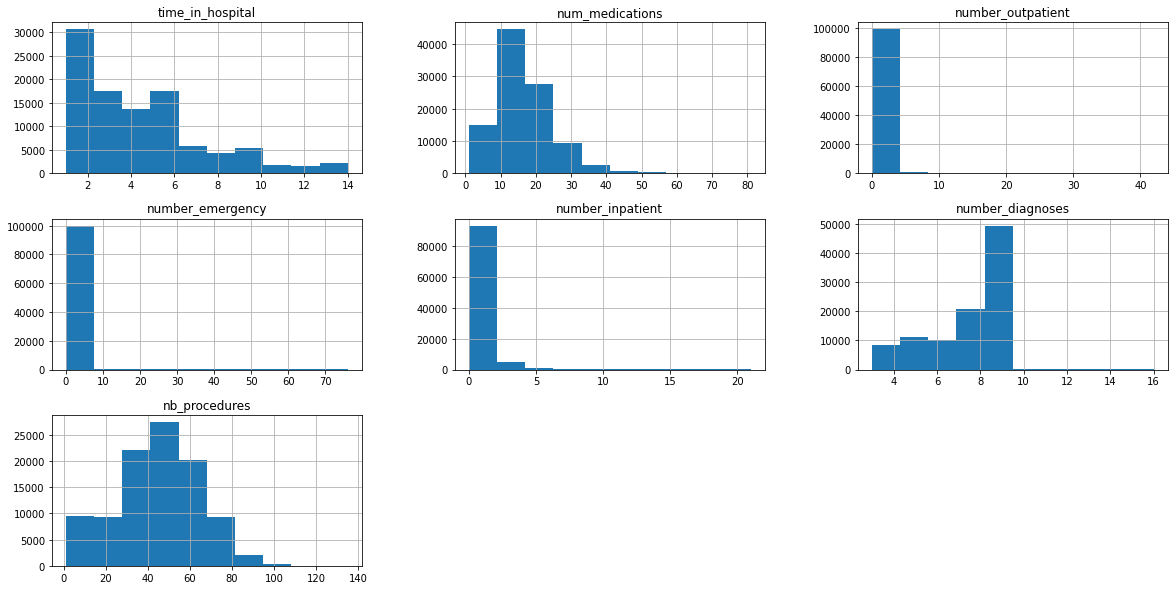

In [37]:
# distribution des colonnes numériques:
num = list(df.select_dtypes(['int64']).columns)
num_exclude = ['encounter_id', 'patient_nbr', 'admission_type_id']
num_cleaned = [x for x in num if x not in num_exclude]
cat = list(df.select_dtypes(['object']).columns)
num_cleaned
df[num_cleaned].hist(figsize=(20,10));

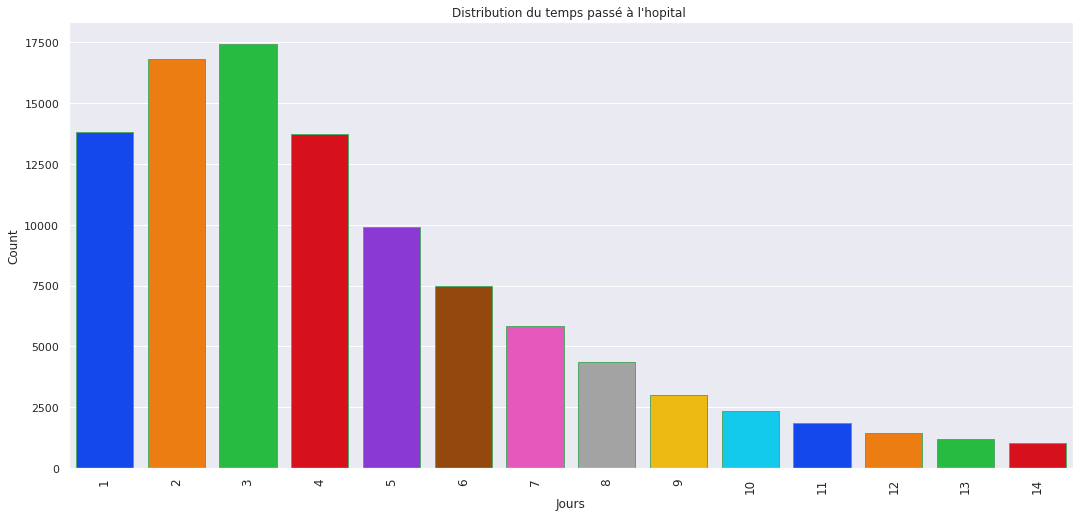

In [39]:
#temps passé à l'hopital 
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',   data= df,color="b", palette ='bright', saturation = 0.85, edgecolor='g', linewidth=1)
plt.xlabel("Jours", size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title("Distribution du temps passé à l'hopital ", size = 12)
plt.show()

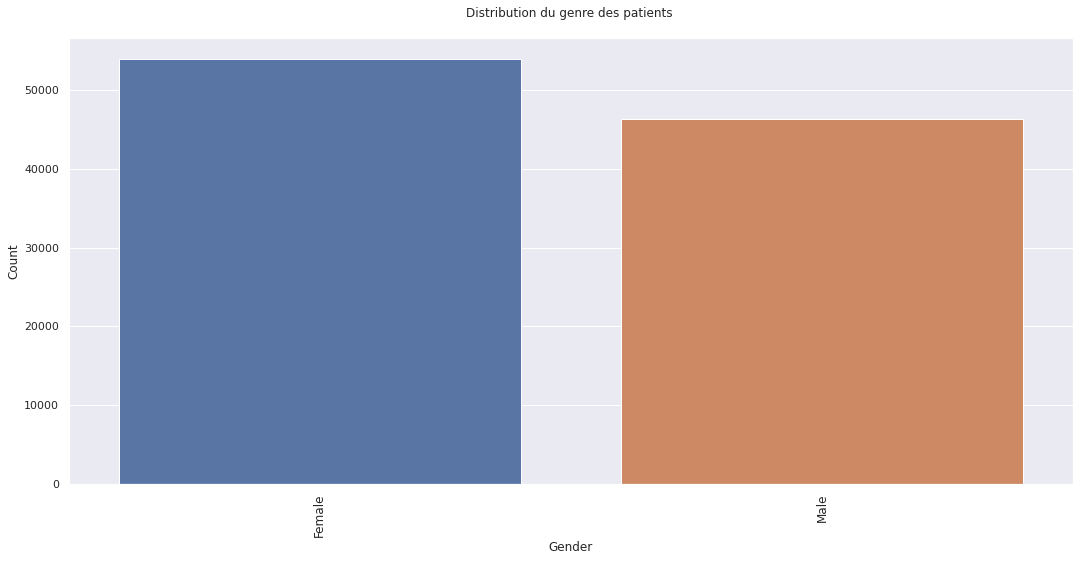

In [40]:

# Disrtibution des genres: 
ax = sns.countplot(x='gender',   data= df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution du genre des patients \n', size = 12)
plt.show()

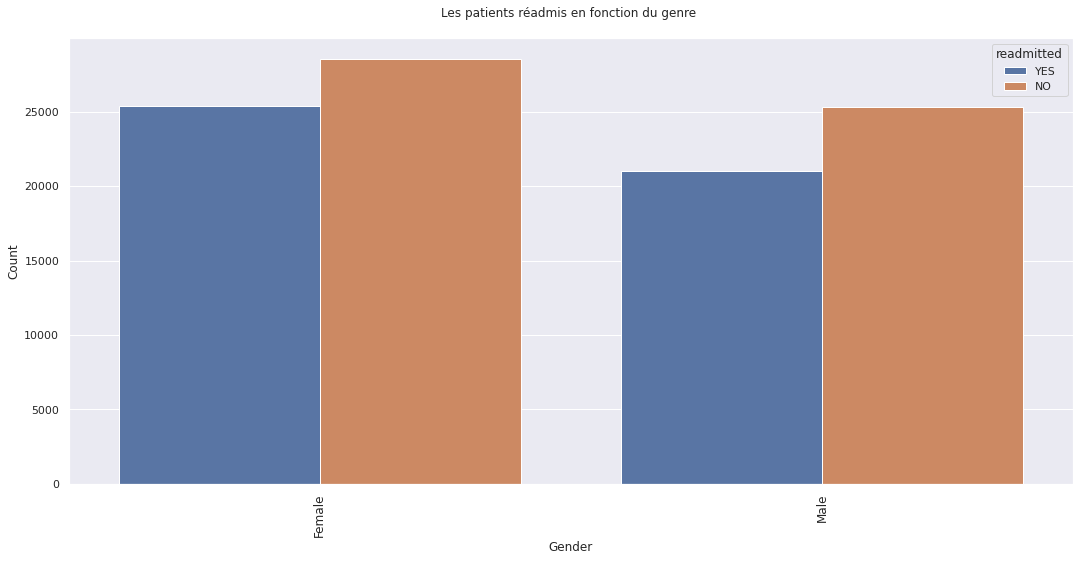

In [41]:
ax = sns.countplot(x="gender", hue="readmitted", data=df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Les patients réadmis en fonction du genre \n', size = 12)
plt.show()

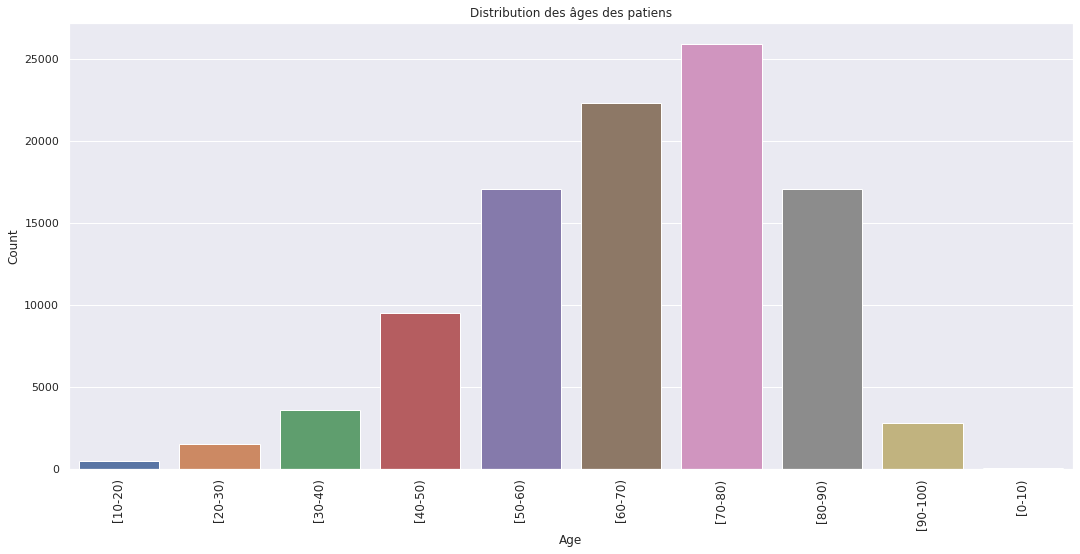

In [42]:
# Distribution de l'age(intervales)
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title("Distribution des âges des patiens", size = 12)
plt.show()

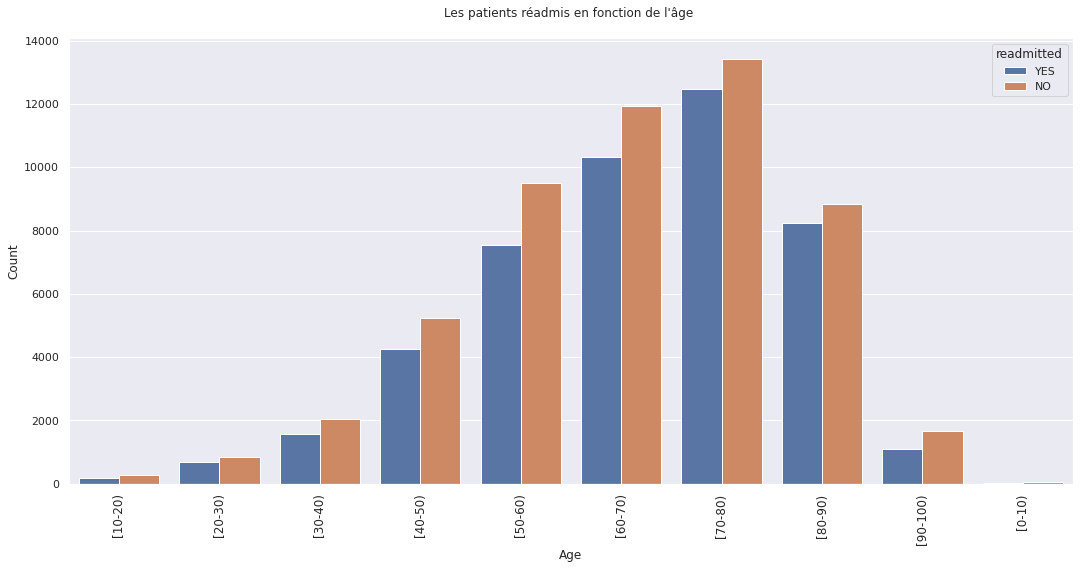

In [43]:
#distribtion readmission en fonction de l'age :
ax = sns.countplot(x="age", hue="readmitted", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title("Les patients réadmis en fonction de l'âge \n", size = 12)
plt.show()

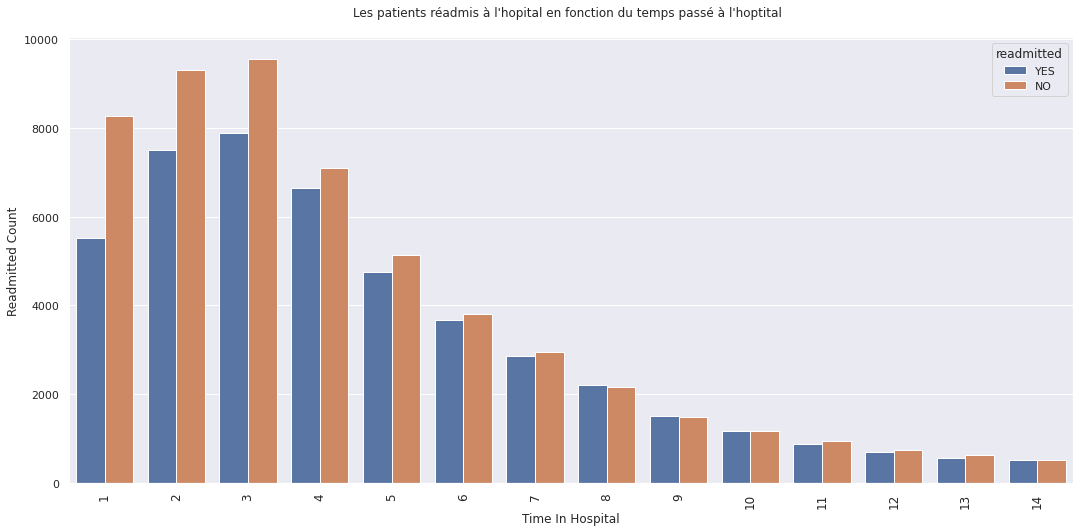

In [44]:
# relation entre temps à l'hoptiral et la readmission 
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  hue= 'readmitted',  data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title("Les patients réadmis à l'hopital en fonction du temps passé à l'hoptital  \n", size = 12)
plt.show()

## Axe problématique : Nombre de diagnostic nécéssaire pour améliorer son diabète ?


In [85]:
df.insulin.unique
(df.insulin=='Steady').sum()


21765

In [88]:
ins=df[df.insulin=='Up' ]
ins

,race,gender,age,admission_type_id,time_in_hospital,num_medications,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,nb_procedures,nb_encounter
patient_nbr,,,,,,,,,,,,,,,
35271,Caucasian,Female,[50-60),1,4,28,9,None,>8,Up,Ch,Yes,NO,40,3
45036,Caucasian,Male,[60-70),3,4,28,8,None,None,Up,Ch,Yes,NO,48,1
63090,Caucasian,Female,[50-60),2,6,19,9,None,>8,Up,Ch,Yes,NO,63,1
89676,Caucasian,Male,[60-70),1,3,13,6,None,None,Up,Ch,Yes,NO,56,1
114849,AfricanAmerican,Female,[30-40),1,3,13,5,None,>8,Up,Ch,Yes,NO,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189129353,Caucasian,Female,[80-90),2,1,13,9,None,None,Up,Ch,Yes,NO,54,1
189169511,Caucasian,Male,[80-90),1,4,28,9,None,Norm,Up,Ch,Yes,NO,54,1
189195422,Asian,Female,[70-80),1,5,31,9,None,Norm,Up,Ch,Yes,YES,74,1


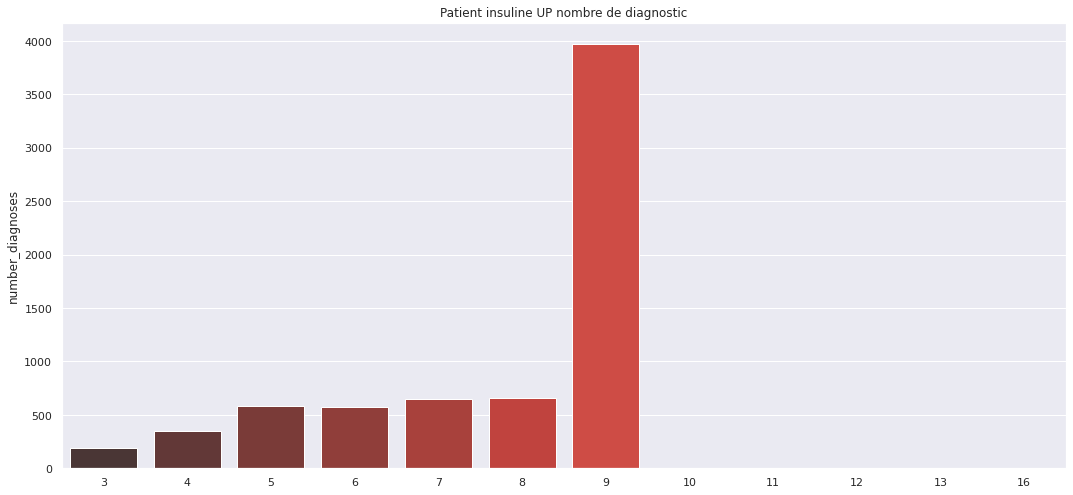

In [89]:
data = ins.number_diagnoses.value_counts().sort_values() 

pal = sns.color_palette("Reds_d", len(data))
rank = data.argsort().argsort()  
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.title('Patient insuline UP nombre de diagnostic')

plt.show()

In [90]:
not_ins=df[df.insulin=='Down' ]
not_ins

,race,gender,age,admission_type_id,time_in_hospital,num_medications,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,nb_procedures,nb_encounter
patient_nbr,,,,,,,,,,,,,,,
1152,AfricanAmerican,Female,[50-60),1,6,15,6,None,None,Down,Ch,Yes,YES,49,3
6723,AfricanAmerican,Female,[60-70),3,4,20,9,None,None,Down,Ch,Yes,NO,4,1
27333,Caucasian,Male,[70-80),2,3,21,8,None,None,Down,Ch,Yes,NO,37,1
30735,Caucasian,Female,[50-60),1,6,15,9,None,None,Down,Ch,Yes,YES,46,10
39051,Caucasian,Male,[50-60),6,3,16,7,None,None,Down,Ch,Yes,NO,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188663279,Caucasian,Male,[50-60),1,2,16,9,None,Norm,Down,Ch,Yes,NO,47,1
189052124,Caucasian,Male,[80-90),1,4,25,9,None,None,Down,Ch,Yes,YES,50,1
189298877,Other,Female,[60-70),1,1,5,5,None,None,Down,Ch,Yes,NO,43,1


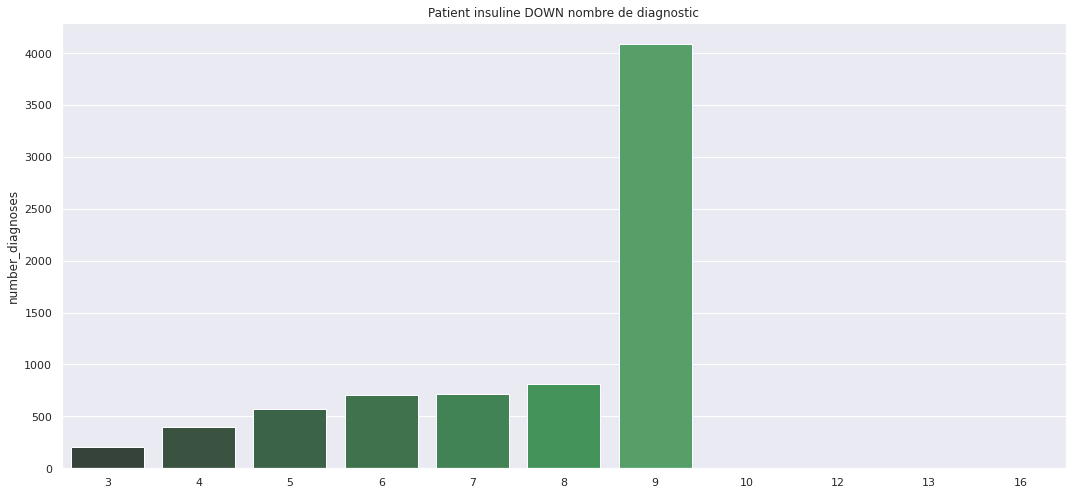

In [91]:
not_ins.number_diagnoses.value_counts().sort_values()



data = not_ins.number_diagnoses.value_counts().sort_values() 

pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.title('Patient insuline DOWN nombre de diagnostic')
plt.show()

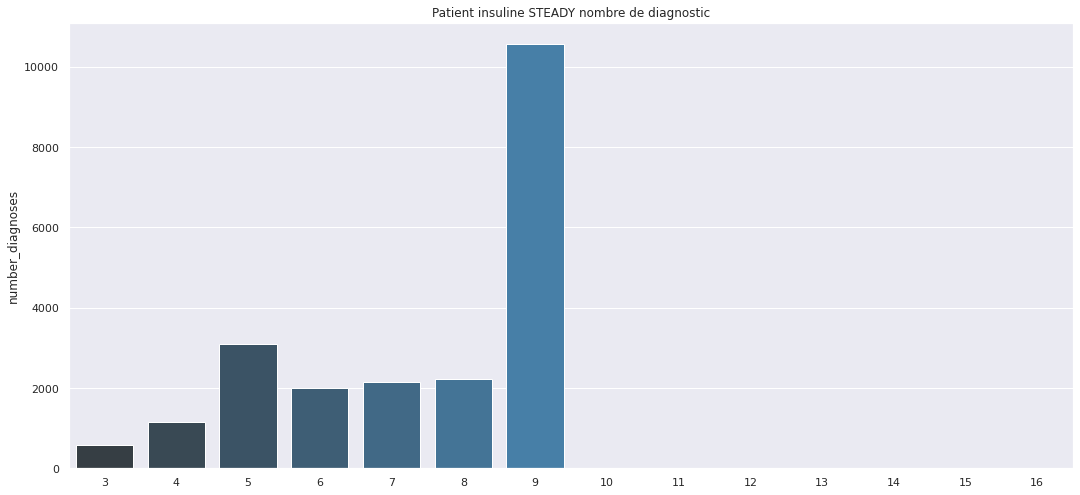

In [92]:
ins_steady=df[df.insulin=='Steady' ]
ins_steady

ins_steady.number_diagnoses.value_counts().sort_values()


data = ins_steady.number_diagnoses.value_counts().sort_values() 

pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.title('Patient insuline STEADY nombre de diagnostic')
plt.show()

In [93]:

ins_Cau=ins[ins.race=='Caucasian']
a=ins_Cau.groupby('age')['number_diagnoses'].count() #personne caucasien et insuline up : nb diag
a.rename('Up', inplace=True)

age
[0-10)         9
[10-20)       52
[20-30)      100
[30-40)      200
[40-50)      487
[50-60)      783
[60-70)     1159
[70-80)     1257
[80-90)      866
[90-100)     149
Name: Up, dtype: int64

In [94]:
ins_fine=df[(df.insulin=='Down')|(df.insulin=='Steady')]
fine_ins_Cau=ins_fine[ins_fine.race=='Caucasian']
b=fine_ins_Cau.groupby('age')['number_diagnoses'].count() #personne caucasienne et insuline Down/Steady: nb diag
b.rename('Down/Steady', inplace=True)

age
[0-10)        34
[10-20)      122
[20-30)      286
[30-40)      628
[40-50)     1790
[50-60)     3559
[60-70)     4890
[70-80)     5610
[80-90)     3786
[90-100)     584
Name: Down/Steady, dtype: int64

In [95]:
cau=pd.DataFrame([a,b])
cau=cau.T
cau

,Up,Down/Steady
age,,
[0-10),9,34
[10-20),52,122
[20-30),100,286
[30-40),200,628
[40-50),487,1790
[50-60),783,3559
[60-70),1159,4890
[70-80),1257,5610
[80-90),866,3786


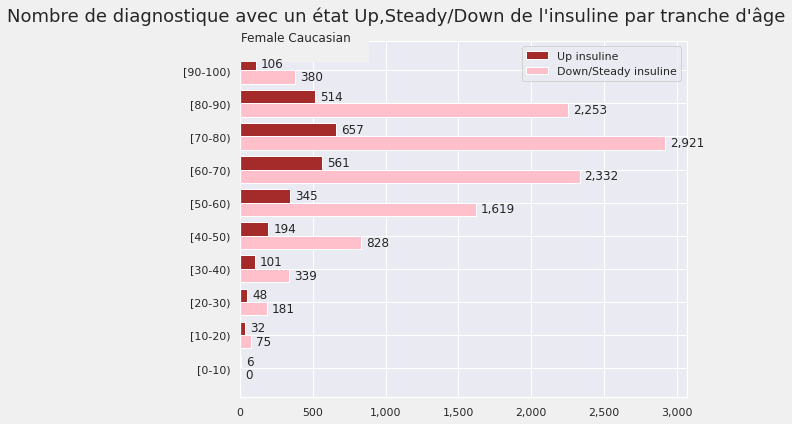

In [97]:

import matplotlib as mpl

#insuline UP des Caucasian Male
ins_cf=ins[(ins.race=='Caucasian') & (ins.gender=='Female')]
c=ins_cf.groupby('age')['number_diagnoses'].count() #personne Af-Am et insuline up : nb diag
c.rename('Up', inplace=True)
c=c.fillna(0)

not_ins=df[(df.insulin=='Down')|(df.insulin=='Steady')]
fine_ins_cf=not_ins[(not_ins.race=='Caucasian') & (not_ins.gender=='Female')]
d=fine_ins_cf.groupby('age')['number_diagnoses'].count() #personne afri et insuline Down/Steady: nb diag
d.rename('Down/Steady', inplace=True)
cau=pd.DataFrame([c,d], dtype=int)
cau=cau.T
cau.at['[0-10)','Down/Steady']=0

#af = af.astype('int')





# Variables
first_bar = cau['Up']
first_bar_label = 'Up insuline'
first_bar_color = 'brown'
second_bar = cau['Down/Steady']
second_bar_label = 'Down/Steady insuline'
second_bar_color = 'pink'
labels = cau.index
width = 0.4  # the width of the bars
plot_title = "Nombre de diagnostique avec un état Up,Steady/Down de l'insuline par tranche d'âge"
title_size = 18
subtitle = 'Female Caucasian'
filename = 'barh-plot'

            
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))

            
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

            
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()

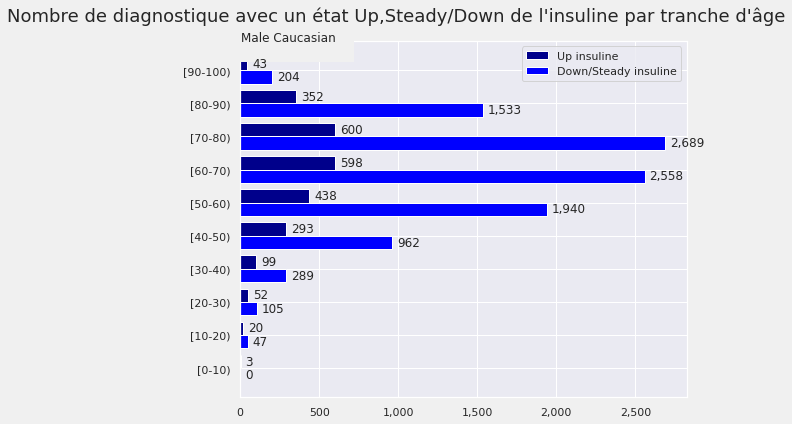

In [98]:


sns.set()

#insuline UP des Caucasian Male
ins_cm=ins[(ins.race=='Caucasian') & (ins.gender=='Male')]
c=ins_cm.groupby('age')['number_diagnoses'].count() #personne Af-Am et insuline up : nb diag
c.rename('Up', inplace=True)
c=c.fillna(0)

not_ins=df[(df.insulin=='Down')|(df.insulin=='Steady')]
fine_ins_cm=not_ins[(not_ins.race=='Caucasian') & (not_ins.gender=='Male')]
d=fine_ins_cm.groupby('age')['number_diagnoses'].count() #personne afri et insuline Down/Steady: nb diag
d.rename('Down/Steady', inplace=True)
cau=pd.DataFrame([c,d], dtype=int)
cau=cau.T
cau.at['[0-10)','Down/Steady']=0

#af = af.astype('int')





# Variables
first_bar = cau['Up']
first_bar_label = 'Up insuline'
first_bar_color = 'darkblue'
second_bar = cau['Down/Steady']
second_bar_label = 'Down/Steady insuline'
second_bar_color = 'blue'
labels = cau.index
width = 0.4  # the width of the bars
plot_title = "Nombre de diagnostique avec un état Up,Steady/Down de l'insuline par tranche d'âge"
title_size = 18
subtitle = 'Male Caucasian'
filename = 'barh-plot'

            
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))

            
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

            
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()

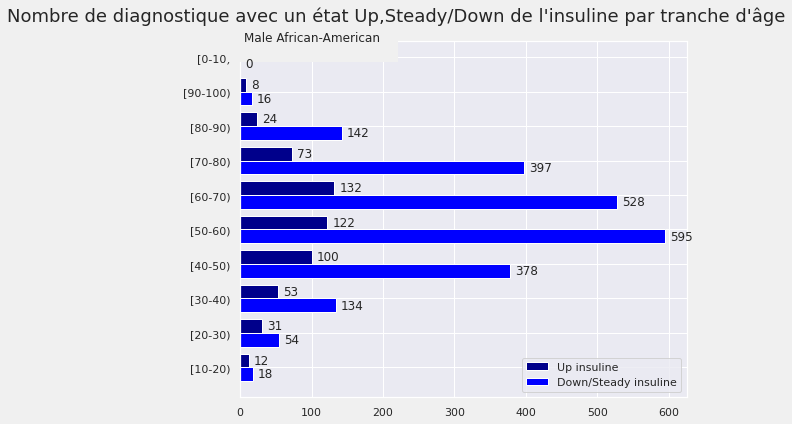

In [99]:




#insuline UP des af am Male
ins_AfM=ins[(ins.race=='AfricanAmerican') & (ins.gender=='Male')]
c=ins_AfM.groupby('age')['number_diagnoses'].count() #personne Af-Am et insuline up : nb diag
c.rename('Up', inplace=True)
c=c.fillna(0)

not_ins=df[(df.insulin=='Down')|(df.insulin=='Steady')]
fine_ins_AfM=not_ins[(not_ins.race=='AfricanAmerican') & (not_ins.gender=='Male')]
d=fine_ins_AfM.groupby('age')['number_diagnoses'].count() #personne afri et insuline Down/Steady: nb diag
d.rename('Down/Steady', inplace=True)
af=pd.DataFrame([c,d], dtype=int)
af=af.T
af.at['[0-10)','Down/Steady']=0

#af = af.astype('int')





# Variables
first_bar = af['Up']
first_bar_label = 'Up insuline'
first_bar_color = 'darkblue'
second_bar = af['Down/Steady']
second_bar_label = 'Down/Steady insuline'
second_bar_color = 'blue'
labels = af.index
width = 0.4  # the width of the bars
plot_title = "Nombre de diagnostique avec un état Up,Steady/Down de l'insuline par tranche d'âge"
title_size = 18
subtitle = 'Male African-American'
filename = 'barh-plot'

            
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))

            
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

            
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()   

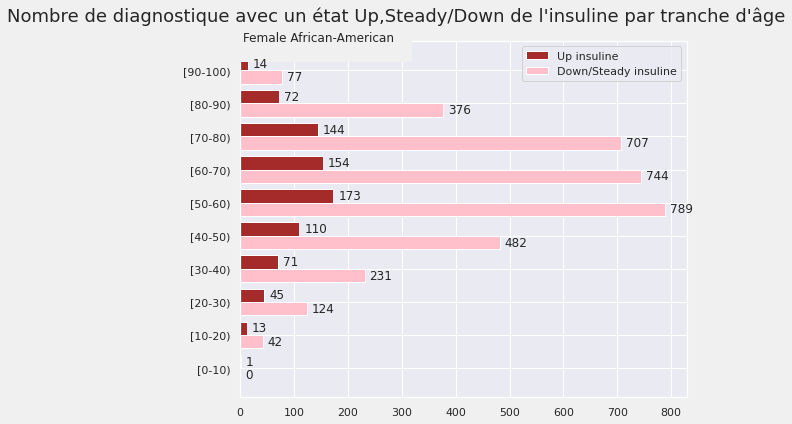

In [100]:
#insuline UP des af am Female
ins_AfF=ins[(ins.race=='AfricanAmerican') & (ins.gender=='Female')]
c=ins_AfF.groupby('age')['number_diagnoses'].count() #personne Af-Am et insuline up : nb diag
c.rename('Up', inplace=True)
c=c.fillna(0)

not_ins=df[(df.insulin=='Down')|(df.insulin=='Steady')]
fine_ins_AfF=not_ins[(not_ins.race=='AfricanAmerican') & (not_ins.gender=='Female')]
d=fine_ins_AfF.groupby('age')['number_diagnoses'].count() #personne afri et insuline Down/Steady: nb diag
d.rename('Down/Steady', inplace=True)
af=pd.DataFrame([c,d], dtype=int)
af=af.T
af.at['[0-10)','Down/Steady']=0

#af = af.astype('int')
af

# Variables
first_bar = af['Up']
first_bar_label = 'Up insuline'
first_bar_color = 'brown'
second_bar = af['Down/Steady']
second_bar_label = 'Down/Steady insuline'
second_bar_color = 'pink'
labels = af.index
width = 0.4  # the width of the bars
plot_title = "Nombre de diagnostique avec un état Up,Steady/Down de l'insuline par tranche d'âge"
title_size = 18
subtitle = 'Female African-American'
filename = 'barh-plot'

            
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))

            
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

            
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.show()  
 

## Problématique: 
- Evaluer la fréquence du nombre de visite en fonction de la tranche age
- Evaluer la fréquence du nombre de visite en fonction de l'éthnie'

In [54]:
# on s'intéresse aux rencontres
df_encounters_check = dF.groupby(['patient_nbr']).agg(encounters = ('encounter_id', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_encounters_check

,patient_nbr,encounters
54474,88785891,40
32927,43140906,28
3515,1660293,23
17018,23199021,23
54057,88227540,23
...,...,...
26948,34935156,1
26949,34935795,1
26950,34935804,1
26951,34937658,1


In [55]:
df_encounters_check[df_encounters_check['encounters']>1]# 16773
df_encounters_check[df_encounters_check['encounters']==1]# 54745

,patient_nbr,encounters
67782,113027103,1
47538,76294341,1
69175,128362955,1
47108,74831733,1
68950,124906928,1
...,...,...
26948,34935156,1
26949,34935795,1
26950,34935804,1
26951,34937658,1


In [56]:
df_rencontres_problematique = pd.merge(df_encounters_check,df[['patient_nbr','race','age']],how='inner',on = 'patient_nbr')

In [57]:
df_rencontres_problematique_age = df_rencontres_problematique.groupby('age').agg({'encounters': 'sum'})
df_rencontres_problematique_age.reset_index(level = 'age')

,age,encounters
0,[0-10),67
1,[10-20),498
2,[20-30),1571
3,[30-40),3678
4,[40-50),9525
5,[50-60),17063
6,[60-70),22456
7,[70-80),25847
8,[80-90),17129
9,[90-100),2800


In [58]:
df_rencontres_problematique = pd.merge(df_encounters_check,df[['patient_nbr','race','age']],how='inner',on = 'patient_nbr')
df_rencontres_problematique['race']= df_rencontres_problematique['race'].replace('Asian','Other')
df_rencontres_problematique['race']= df_rencontres_problematique['race'].replace('Hispanic','Other')
df_rencontres_problematique_age = df_rencontres_problematique.groupby('age').agg({'encounters': 'sum'})
df_rencontres_problematique_age.reset_index(level = 'age')
df_rencontres_problematique_race = df_rencontres_problematique.groupby('race').agg({'encounters': 'sum'})

df_rencontres_problematique_race = df_rencontres_problematique_race.reset_index(level = 'race')

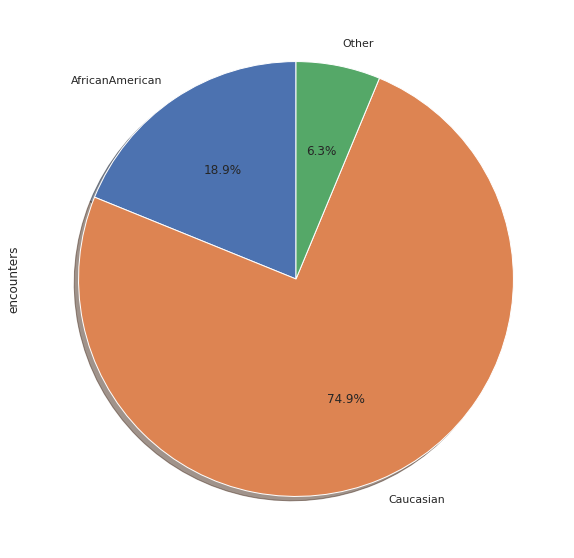

In [59]:
df_rencontres_problematique_race = df_rencontres_problematique.groupby('race')['encounters'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

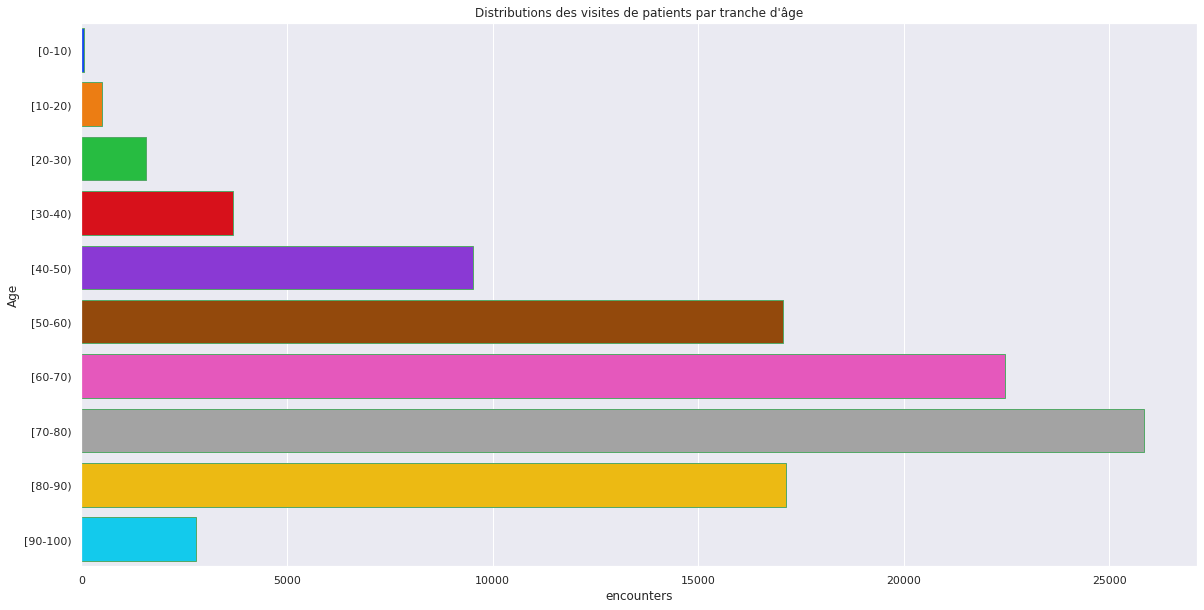

In [60]:
#df_rencontres_problematique.groupby('age')['encounters'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90, labeldistance = 1.3,
#figsize=(15,10), autopct='%1.1f%%')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Distributions des visites de patients par tranche d'âge")
ax.set_xlabel("Encouters")
ax.set_ylabel("Age")
#sns.set_color_codes("pastel")

sns.barplot(data=df_rencontres_problematique_age,x='encounters',y=list(df_rencontres_problematique_age.index), palette ='bright', saturation = 0.85, edgecolor='g')

### Problématique : Quel est l'individu type (genre, ethnie, age) qui passe le plus de temps à l'hopital ?

In [61]:
time_max_hosp=df[df.time_in_hospital==max(df.time_in_hospital)]
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

time_max_hosp['race'+'_enc']= ord_enc.fit_transform(time_max_hosp[['race']])
time_max_hosp['gender'+'_enc']= ord_enc.fit_transform(time_max_hosp[['gender']])
time_max_hosp['age'+'_enc']= ord_enc.fit_transform(time_max_hosp[['age']])
time_max_hosp 

<ipython-input-61-3d15713e02fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_max_hosp['race'+'_enc']= ord_enc.fit_transform(time_max_hosp[['race']])
<ipython-input-61-3d15713e02fd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_max_hosp['gender'+'_enc']= ord_enc.fit_transform(time_max_hosp[['gender']])
<ipython-input-61-3d15713e02fd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,patient_nbr,race,gender,age,admission_type_id,time_in_hospital,num_medications,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,nb_procedures,nb_encounter,race_enc,gender_enc,age_enc
61382,1629,Caucasian,Male,[70-80),3,14,15,7,None,None,Steady,No,Yes,YES,21,1,2.0,1.0,5.0
1891,42867,Caucasian,Male,[40-50),2,14,16,9,None,None,Down,Ch,Yes,NO,72,2,2.0,1.0,2.0
34245,118809,AfricanAmerican,Female,[50-60),1,14,29,5,None,>8,Up,Ch,Yes,NO,51,3,0.0,0.0,3.0
34375,163890,AfricanAmerican,Female,[70-80),2,14,17,5,None,>7,Steady,No,Yes,NO,56,1,0.0,0.0,5.0
3830,198405,Caucasian,Male,[50-60),3,14,31,9,None,None,No,No,No,YES,78,4,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93049,181286978,Caucasian,Female,[60-70),1,14,48,9,None,Norm,Down,Ch,Yes,YES,75,1,2.0,0.0,4.0
95456,181376645,Caucasian,Female,[70-80),1,14,16,9,None,None,No,No,No,YES,30,1,2.0,0.0,5.0
101458,185422307,Caucasian,Male,[40-50),3,14,13,4,None,None,No,No,Yes,NO,64,1,2.0,1.0,2.0
101755,188574944,Other,Female,[40-50),1,14,26,9,None,>8,Up,Ch,Yes,YES,79,1,4.0,0.0,2.0


In [64]:
time_max_hosp['race']= time_max_hosp['race'].replace('Asian','Other')
time_max_hosp['race']= time_max_hosp['race'].replace('Hispanic','Other')
patients = time_max_hosp.groupby('race')['patient_nbr'].nunique()
patients

<ipython-input-64-c3bcb24120ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_max_hosp['race']= time_max_hosp['race'].replace('Asian','Other')
<ipython-input-64-c3bcb24120ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_max_hosp['race']= time_max_hosp['race'].replace('Hispanic','Other')


race
AfricanAmerican    136
Caucasian          495
Other               50
Name: patient_nbr, dtype: int64

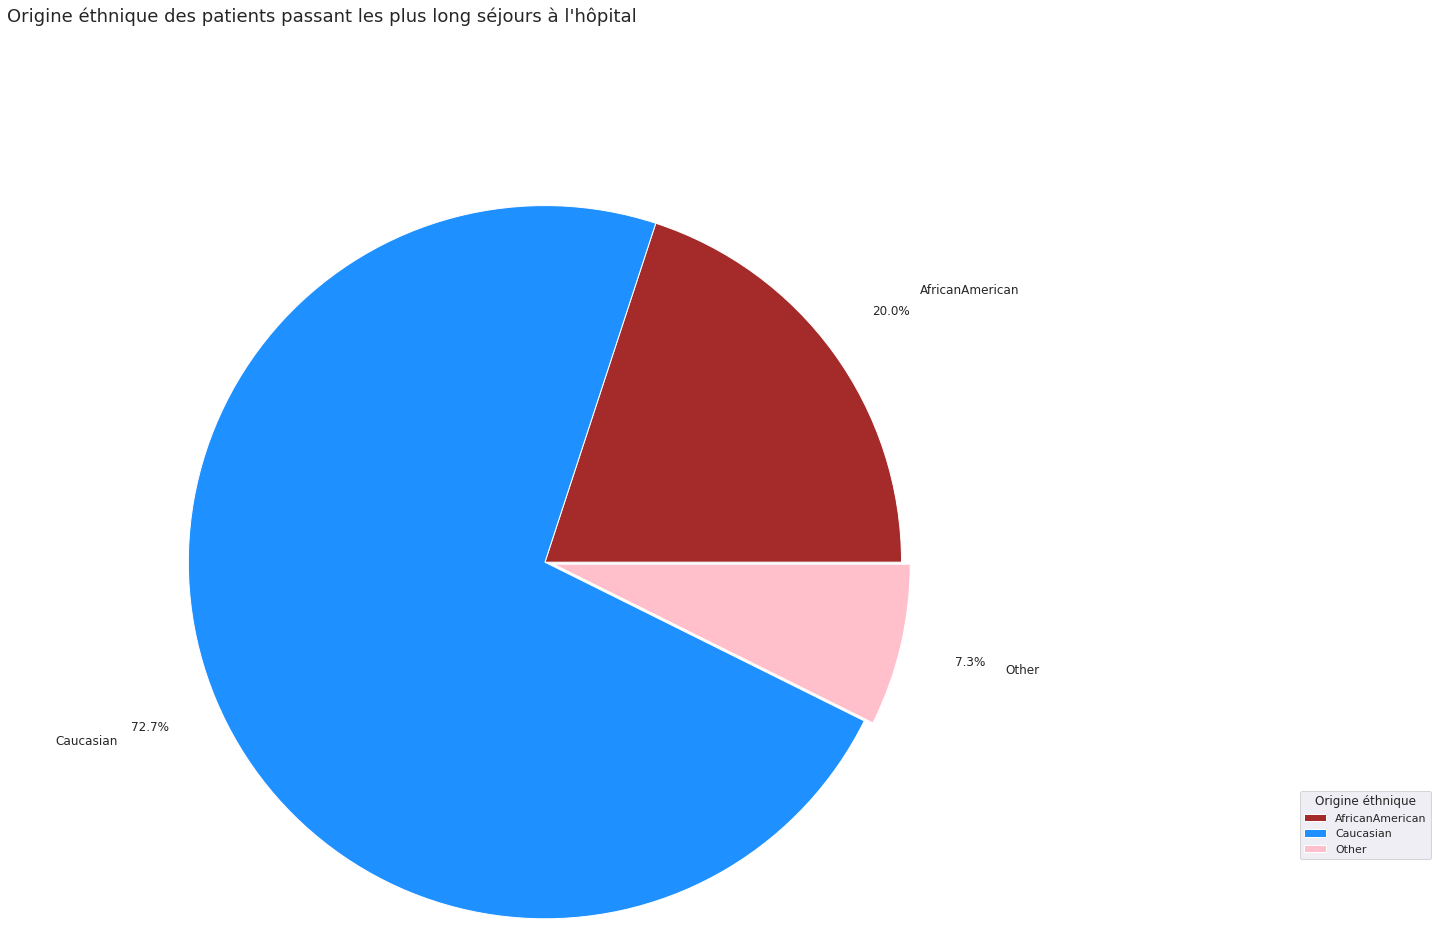

In [65]:

patients = time_max_hosp.groupby('race')['patient_nbr'].nunique()


plt.title("Origine éthnique des patients passant les plus long séjours à l'hôpital", fontsize=18, x=0, y=1.7)

plt.pie(patients, 
        labels=patients.index, 
        explode=[0, 0, 0.05],
        pctdistance = 1.2, 
        labeldistance = 1.3,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 12},
        radius = 2,
        colors = ["brown", "dodgerblue" ,'pink']
        )

plt.legend(loc="best", bbox_to_anchor=(2.5,0), title="Origine éthnique")


In [66]:
Patients = time_max_hosp.groupby('age')['patient_nbr'].nunique()
Patients

age
[20-30)       8
[30-40)      12
[40-50)      56
[50-60)     103
[60-70)     147
[70-80)     183
[80-90)     156
[90-100)     16
Name: patient_nbr, dtype: int64

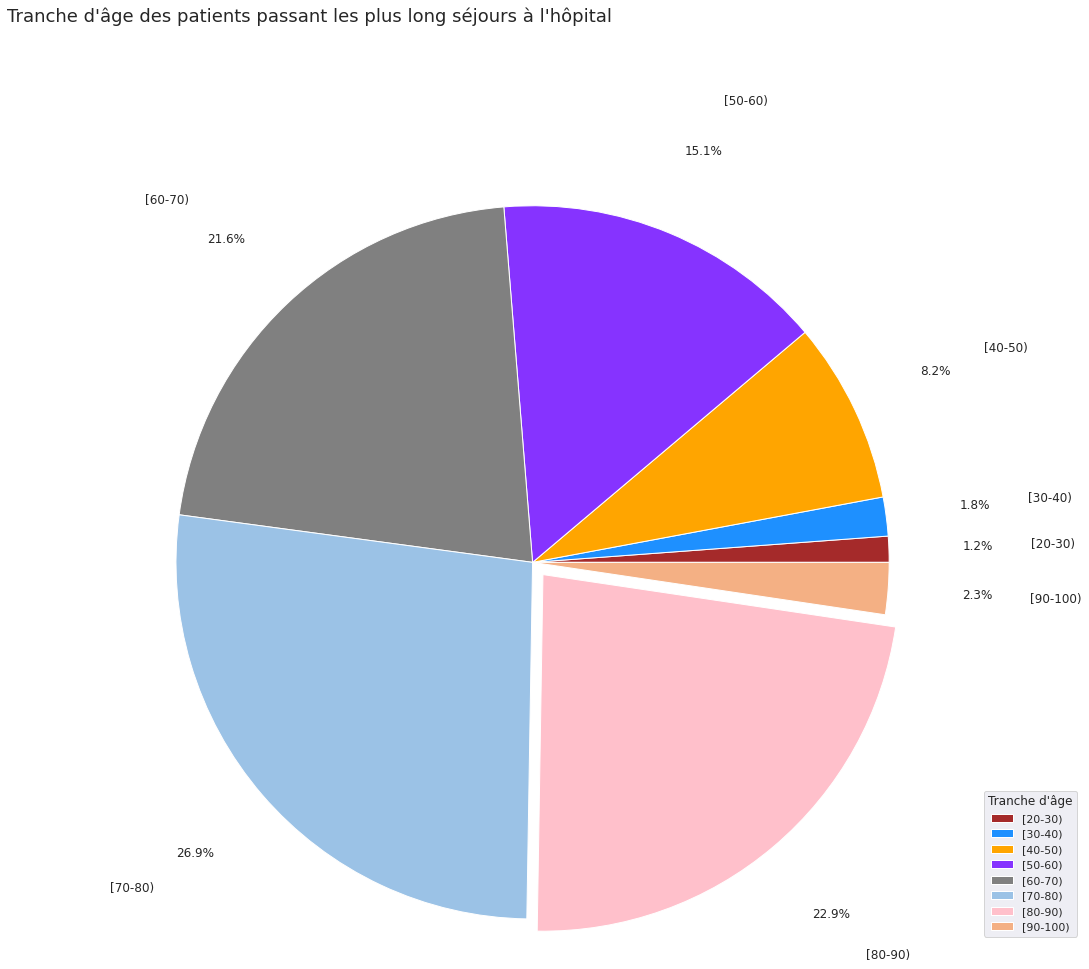

In [68]:
plt.title("Tranche d'âge des patients passant les plus long séjours à l'hôpital", fontsize=18, x=0, y=1.7)

plt.pie(Patients, 
        labels=Patients.index, 
        explode=[ 0, 0, 0,0, 0,0,0.09, 0],
        pctdistance = 1.25, 
        labeldistance = 1.4,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 12},
        radius = 2,
        colors = ["brown", "dodgerblue" ,'orange', "#8633FF",'grey',"#9BC2E6",'pink', "#F4B084", "#00B050"]
        )

plt.legend(loc="best", bbox_to_anchor=(1.5,0), title="Tranche d'âge")

In [69]:
g = time_max_hosp.groupby('gender')['patient_nbr'].nunique()
g

gender
Female    378
Male      303
Name: patient_nbr, dtype: int64

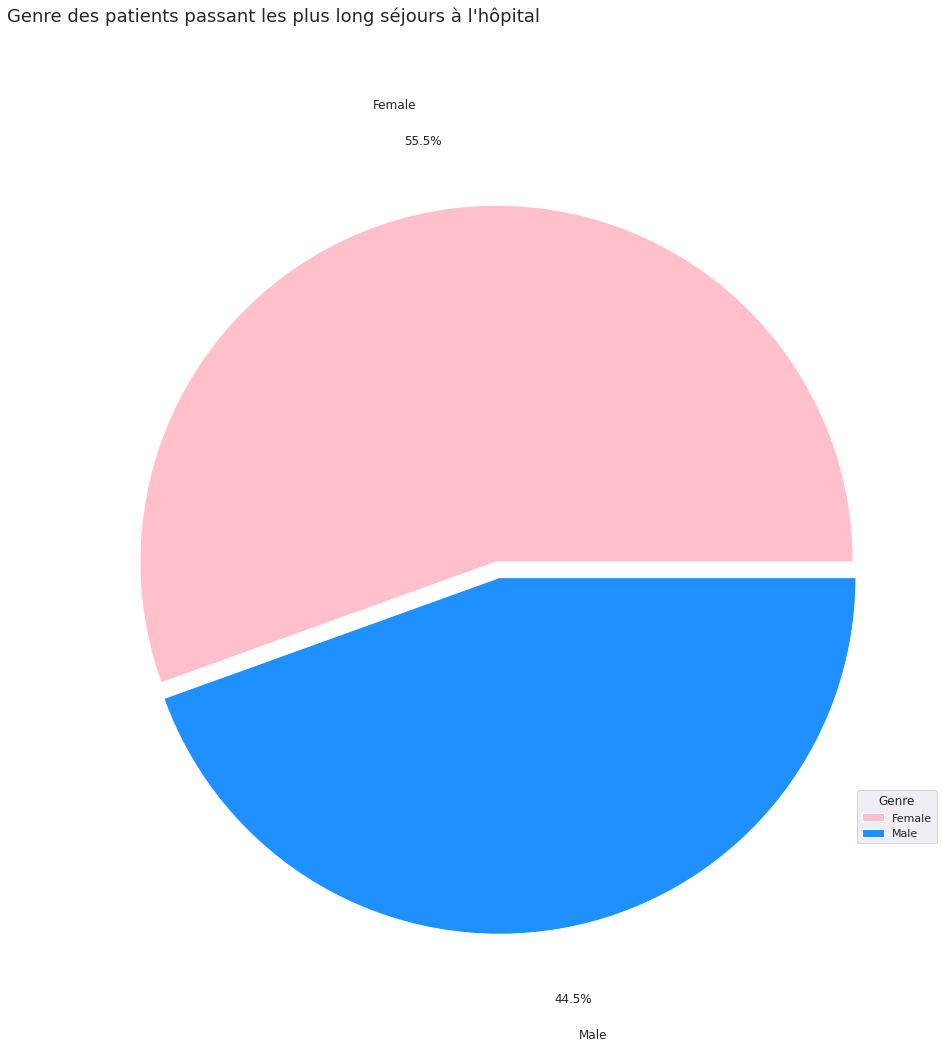

In [70]:
plt.title("Genre des patients passant les plus long séjours à l'hôpital", fontsize=18, x=0, y=1.7)

plt.pie(g, 
        labels=g.index, 
        explode=[ 0,0.09],
        pctdistance = 1.2, 
        labeldistance = 1.3,
        autopct=lambda x: f'{x:.1f}%',
        textprops={"family": "Arial", "size": 12},
        radius = 2,
        colors = ['pink',"dodgerblue"]
        )

plt.legend(loc="best", bbox_to_anchor=(1.5,0), title="Genre")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 1280x800 with 0 Axes>

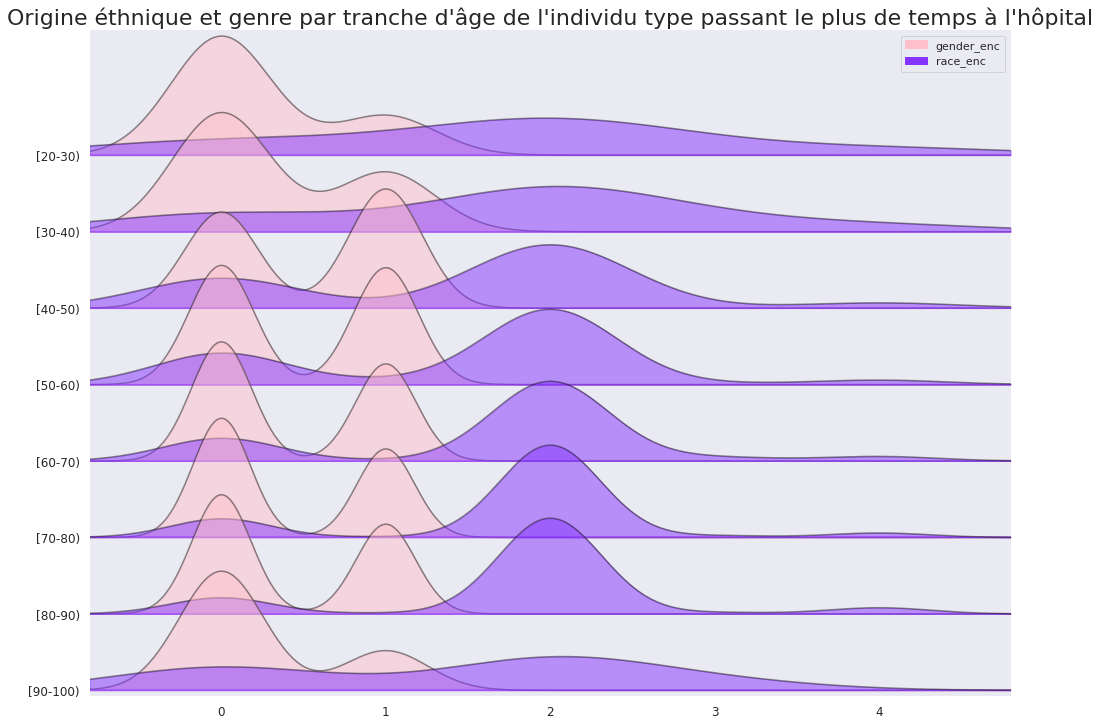

In [72]:


!pip install joypy
import joypy



# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(time_max_hosp, column=['gender_enc', 'race_enc'], by="age", ylim='own', figsize=(14,10), legend=True, color=['pink',  "#8633FF"], alpha=0.5)

# Decoration
plt.title("Origine éthnique et genre par tranche d'âge de l'individu type passant le plus de temps à l'hôpital", fontsize=22)
plt.show()

Remarque : Caucasian=2. African-American=0. Female=0. Male=1


<Figure size 1280x800 with 0 Axes>

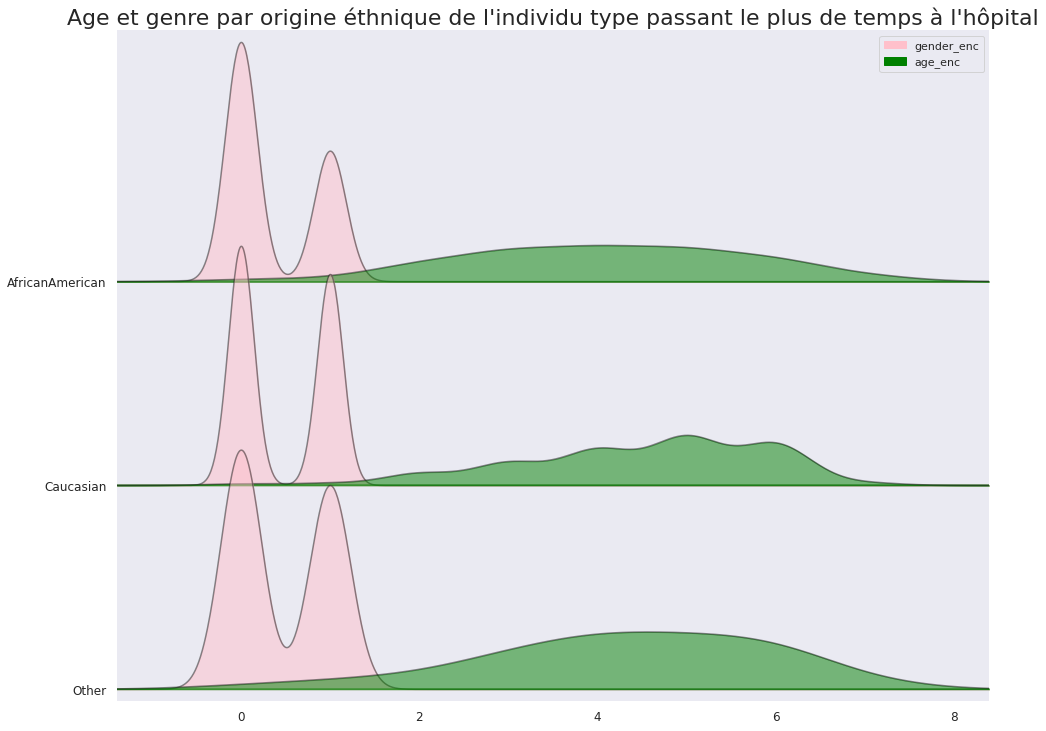

In [73]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(time_max_hosp, column=['gender_enc', 'age_enc'], by="race", ylim='own', figsize=(14,10), legend=True, color=['pink', 'green'], alpha=0.5)

# Decoration
plt.title("Age et genre par origine éthnique de l'individu type passant le plus de temps à l'hôpital", fontsize=22)
plt.show()

<Figure size 1280x800 with 0 Axes>

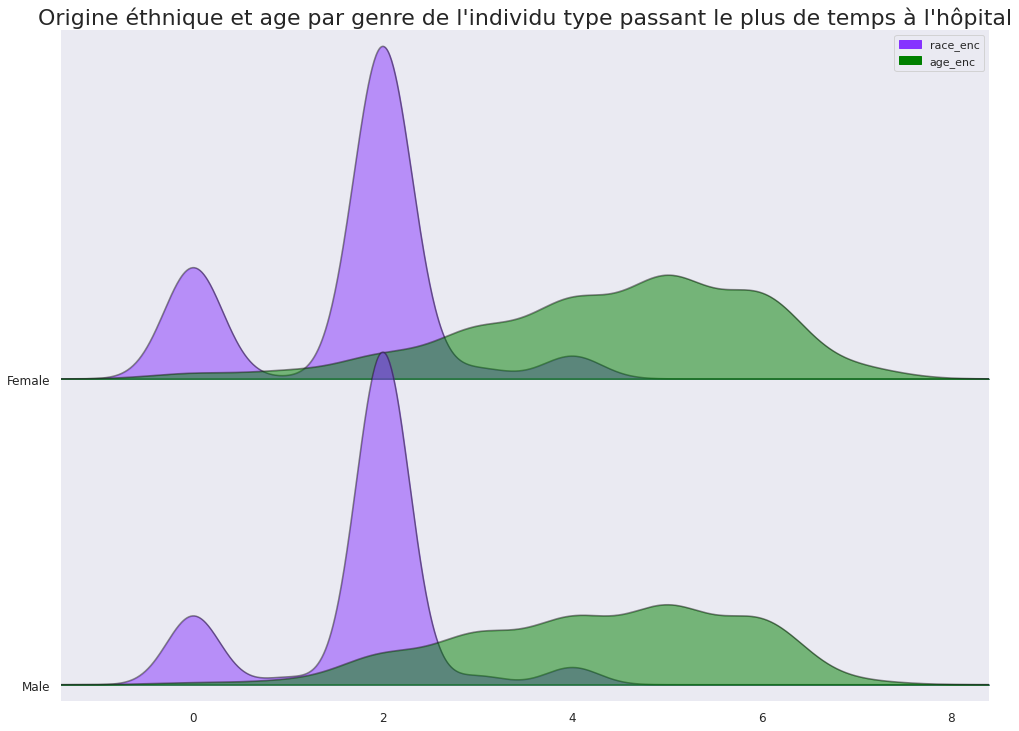

In [74]:

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(time_max_hosp, column=['race_enc', 'age_enc'], by="gender", ylim='own', figsize=(14,10), legend=True, color=[ "#8633FF", 'green'], alpha=0.5)

# Decoration
plt.title("Origine éthnique et age par genre de l'individu type passant le plus de temps à l'hôpital", fontsize=22)
plt.show()

#### CONCLUSION : L'individu type est une femme américaine de type caucassienne agée entre 70 et 80 ans.



# Problématique ML : PREDIRE LA READMISSION A L HOPITAL

## df_ml dataframe déjà encodé précédemment avec les joyplots pour ML, sans normalisation des colonnes numériques


In [77]:
#df=df.drop(columns=['number_emergency','number_inpatient','number_outpatient','diag_1','diag_2','diag_3'])
#Preparation de encoding :
numerical_columns = list(df._get_numeric_data().columns)
numerical_columns

['patient_nbr',
 'admission_type_id',
 'time_in_hospital',
 'num_medications',
 'number_diagnoses',
 'nb_procedures',
 'nb_encounter']

In [78]:
#On retire les colonnes id pas d'interet à être encodées:
numerical_columns=numerical_columns[3:]
numerical_columns

['num_medications', 'number_diagnoses', 'nb_procedures', 'nb_encounter']

In [79]:
categorical_columns =[x for x in list(df.columns) if x not in numerical_columns+['admission_type_id','discharge_disposition_id','admission_source_id','encounter_id',
 'patient_nbr'] ]
categorical_columns

['race',
 'gender',
 'age',
 'time_in_hospital',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

### Préparation dataset pour la problématique ML: drop colonnes moins interessantes

In [80]:
df

,patient_nbr,race,gender,age,admission_type_id,time_in_hospital,num_medications,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,nb_procedures,nb_encounter
4780,135,Caucasian,Female,[50-60),1,3,14,5,None,None,No,Ch,Yes,YES,32,2
5827,378,Caucasian,Female,[50-60),3,2,11,3,None,None,No,No,No,NO,50,1
67608,729,Caucasian,Female,[80-90),1,4,23,9,None,>7,No,No,Yes,NO,70,1
17494,774,Caucasian,Female,[80-90),1,3,20,9,None,>8,No,Ch,Yes,NO,46,1
2270,927,AfricanAmerican,Female,[30-40),1,5,5,3,None,None,No,No,Yes,NO,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99863,189351095,Caucasian,Female,[80-90),1,1,11,9,None,None,No,No,No,NO,74,1
95282,189365864,Other,Male,[60-70),1,3,8,7,None,None,Steady,No,Yes,NO,57,1
93651,189445127,Caucasian,Female,[80-90),1,3,18,9,None,None,Down,Ch,Yes,NO,39,1
101748,189481478,Caucasian,Female,[40-50),1,14,16,5,None,>7,Down,Ch,Yes,YES,69,1


#### Logistic regression 


In [84]:
#df=df.sort_values(by=['patient_nbr'])
#df=df.drop_duplicates(subset=['patient_nbr'], keep='last')
#df['nb_encounter']=list(a.values)
#df=df.drop(['encounter_id'])
#df

df.set_index('patient_nbr', inplace=True)

In [103]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

df_ml=pd.DataFrame(df,columns=numerical_columns)
for col in categorical_columns:
  if col in df.columns:
    df_ml[col+'_enc']= ord_enc.fit_transform(df[[col]])
df_ml

,num_medications,number_diagnoses,nb_procedures,nb_encounter,race_enc,gender_enc,age_enc,time_in_hospital_enc,max_glu_serum_enc,A1Cresult_enc,insulin_enc,change_enc,diabetesMed_enc,readmitted_enc
patient_nbr,,,,,,,,,,,,,,
135,14,5,32,2,2.0,0.0,5.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0
378,11,3,50,1,2.0,0.0,5.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0
729,23,9,70,1,2.0,0.0,8.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0
774,20,9,46,1,2.0,0.0,8.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
927,5,3,49,1,0.0,0.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189351095,11,9,74,1,2.0,0.0,8.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0
189365864,8,7,57,1,4.0,1.0,6.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0
189445127,18,9,39,1,2.0,0.0,8.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0


In [ ]:
#avec normalisation des données num:
##### MOINS BON
df_ml2=pd.DataFrame(df,columns=numerical_columns)
np.random.seed(0)

def minmax_norm(df1):
    return (df1 - df1.min()) / ( df1.max() - df1.min())

df_ml2 = minmax_norm(df_ml2)

for col in categorical_columns:
    if col in df.columns:
        df_ml2[col+'_enc']= ord_enc.fit_transform(df[[col]])
df_ml2

In [105]:
df_ml.columns

Index(['num_medications', 'number_diagnoses', 'nb_procedures', 'nb_encounter',
       'race_enc', 'gender_enc', 'age_enc', 'time_in_hospital_enc',
       'max_glu_serum_enc', 'A1Cresult_enc', 'insulin_enc', 'change_enc',
       'diabetesMed_enc', 'readmitted_enc'],
      dtype='object')

In [108]:
train = ['num_medications', 'number_diagnoses', 'nb_procedures', 'nb_encounter',
       'race_enc', 'gender_enc', 'age_enc', 'time_in_hospital_enc',
       'max_glu_serum_enc', 'A1Cresult_enc', 'insulin_enc', 'change_enc',
       'diabetesMed_enc']
X = df_ml[train]
Y = df_ml['readmitted_enc']

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25)
scaler = preprocessing.StandardScaler().fit(X_train)

#X_train = min_max_scaler.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
#X_test = min_max_scaler.fit_transform(X_test)
X_test = scaler.fit_transform(X_test)

X_test

array([[ 1.45119282,  0.86369333,  1.60783713, ..., -1.72443781,
        -1.10424843,  0.57201525],
       [-0.11706495,  0.331883  , -1.89860665, ..., -0.49106507,
         0.90559332, -1.74820514],
       [-0.72024101, -1.26354799,  0.25535167, ...,  0.74230766,
         0.90559332,  0.57201525],
       ...,
       [ 0.60674633,  0.86369333,  0.85645632, ..., -0.49106507,
         0.90559332, -1.74820514],
       [ 0.48611112,  0.86369333,  0.80636427, ..., -0.49106507,
         0.90559332, -1.74820514],
       [-1.32341708,  0.86369333, -0.09529271, ..., -0.49106507,
         0.90559332, -1.74820514]])

In [116]:
## RUN TEST logistic regression


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model_params ={
 'logistic_regression':{
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,5,10],
        }
    }
}

scores = []

for model_name,mp in model_params.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    df1 = GridSearchCV(mp['model'],mp['params'],cv = cv)
    df1.fit(X_train,Y_train)
    scores.append({
        'model' : model_name,
        'accuracy' : df1.best_score_,
        'best_params': df1.best_params_        
    })

df_scores= pd.DataFrame(scores)
df_scores

,model,accuracy,best_params
0,logistic_regression,0.744381,{'C': 10}


In [110]:
model=LogisticRegression(C=10)
model.fit(X_train,Y_train)
result=model.predict(X_test)
result

array([1., 0., 1., ..., 1., 0., 0.])

In [111]:
np.unique(result)

array([0., 1.])

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
confusion_matrix(y_test, result)
thresh = 0.5
auc = roc_auc_score(y_test, result)
accuracy = accuracy_score(y_test, result)
recall = recall_score(y_test, result)
precision = precision_score(y_test, (result > thresh))
fscore = f1_score(y_test,(result > thresh) )
print('AUC:%.3f'%auc)
print('Accuracy:%.3f'%accuracy)
print('Recall:%.3f'%recall)
print('Precision:%.3f'%precision)
print(f'confusion_matrix:\n{confusion_matrix(y_test, result)}')

AUC:0.654
Accuracy:0.744
Recall:0.381
Precision:0.726
confusion_matrix:
[[10846   848]
 [ 3661  2249]]


In [ ]:
thresh = 0.5
auc = roc_auc_score(y_test, result)
accuracy = accuracy_score(y_test, result)
recall = recall_score(y_test, result)
precision = precision_score(y_test, (result > thresh))
fscore = f1_score(y_test,(result > thresh) )
print('AUC:%.3f'%auc)
print('accuracy:%.3f'%accuracy)
print('recall:%.3f'%recall)
print('precision:%.3f'%precision)
print('fscore:%.3f'%fscore)
print(f'confusion_matrix:\n{confusion_matrix(y_test, result)}')

In [ ]:
import joblib
joblib_file="regressionModel.joblib"
joblib.dump(model,joblib_file)